In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

117


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:641
number of class2:976

 ****** Running generation 0 ****** 

Population's average fitness: 0.52864 stdev: 0.08393
Best fitness: 0.71058 - size: (2, 13) - species 6 - id 184
Average adjusted fitness: 0.227
Mean genetic distance 2.977, standard deviation 0.496
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.358 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54748 stdev: 0.08655
Best fitness: 0.72294 - size: (3, 15) - species 2 - id 243
Average adjusted fitness: 0.185
Mean genetic distance 3.005, standard deviation 0.504
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.586 sec (6.472 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56098 stdev: 0.09271
Best fitness: 0.72294 - size: (3, 15) - species 2 - id 243
Average adjusted fitness: 0.247
Mean genetic distance 3.094, standard deviation 0.532
Population of 202 members in 32 species
T

Population's average fitness: 0.44409 stdev: 0.21584
Best fitness: 0.84106 - size: (2, 13) - species 6 - id 46
Average adjusted fitness: 0.222
Mean genetic distance 3.043, standard deviation 0.498
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.530 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58653 stdev: 0.20478
Best fitness: 0.86333 - size: (3, 15) - species 4 - id 370
Average adjusted fitness: 0.436
Mean genetic distance 3.124, standard deviation 0.509
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.092 sec (5.811 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65419 stdev: 0.18595
Best fitness: 0.86333 - size: (3, 15) - species 29 - id 370
Average adjusted fitness: 0.478
Mean genetic distance 3.118, standard deviation 0.502
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.191 sec (5.937 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.48660 stdev: 0.08723
Best fitness: 0.69202 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.136
Mean genetic distance 2.894, standard deviation 0.452
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.249 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53169 stdev: 0.09038
Best fitness: 0.73531 - size: (3, 15) - species 8 - id 277
Average adjusted fitness: 0.189
Mean genetic distance 3.031, standard deviation 0.469
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.498 sec (7.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56776 stdev: 0.08847
Best fitness: 0.75758 - size: (4, 17) - species 5 - id 536
Average adjusted fitness: 0.230
Mean genetic distance 3.074, standard deviation 0.467
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.954 sec (8.234 ave

Population's average fitness: 0.53072 stdev: 0.15014
Best fitness: 0.77860 - size: (2, 13) - species 3 - id 49
Average adjusted fitness: 0.268
Mean genetic distance 2.942, standard deviation 0.465
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.623 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58310 stdev: 0.15547
Best fitness: 0.81076 - size: (3, 15) - species 25 - id 334
Average adjusted fitness: 0.356
Mean genetic distance 3.009, standard deviation 0.494
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.020 sec (5.822 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61921 stdev: 0.14103
Best fitness: 0.81076 - size: (3, 15) - species 25 - id 334
Average adjusted fitness: 0.342
Mean genetic distance 3.054, standard deviation 0.505
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 8.458 sec (6.700 average)

 ****** Running generation 3 *

Population's average fitness: 0.50547 stdev: 0.07233
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.261
Mean genetic distance 2.925, standard deviation 0.508
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 5.360 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53659 stdev: 0.06509
Best fitness: 0.70872 - size: (2, 13) - species 2 - id 118
Average adjusted fitness: 0.198
Mean genetic distance 3.076, standard deviation 0.498
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.664 sec (5.512 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54395 stdev: 0.07156
Best fitness: 0.76562 - size: (4, 18) - species 8 - id 494
Average adjusted fitness: 0.161
Mean genetic distance 3.139, standard deviation 0.469
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 5.974 sec (5.666 average)

 ****** Running generation 3 **

Population's average fitness: 0.47382 stdev: 0.09278
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.247
Mean genetic distance 2.926, standard deviation 0.476
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 5.310 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52991 stdev: 0.09345
Best fitness: 0.73098 - size: (2, 13) - species 2 - id 134
Average adjusted fitness: 0.199
Mean genetic distance 3.064, standard deviation 0.484
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.757 sec (5.534 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55549 stdev: 0.08593
Best fitness: 0.76623 - size: (4, 16) - species 2 - id 529
Average adjusted fitness: 0.213
Mean genetic distance 3.093, standard deviation 0.463
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.971 sec (5.679 average)

 ****** Running generation 3 **

Population's average fitness: 0.49357 stdev: 0.05436
Best fitness: 0.65615 - size: (2, 13) - species 1 - id 58
Average adjusted fitness: 0.151
Mean genetic distance 2.971, standard deviation 0.467
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.561 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52175 stdev: 0.05695
Best fitness: 0.70686 - size: (3, 14) - species 1 - id 366
Average adjusted fitness: 0.156
Mean genetic distance 3.007, standard deviation 0.463
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.335 sec (5.948 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53233 stdev: 0.06436
Best fitness: 0.70686 - size: (3, 14) - species 27 - id 366
Average adjusted fitness: 0.172
Mean genetic distance 3.016, standard deviation 0.464
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.996 sec (6.297 average)

 ****** Running generation 3 **

Population's average fitness: 0.50595 stdev: 0.06079
Best fitness: 0.68707 - size: (2, 13) - species 6 - id 142
Average adjusted fitness: 0.175
Mean genetic distance 2.829, standard deviation 0.444
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.628 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53536 stdev: 0.06289
Best fitness: 0.71923 - size: (3, 15) - species 12 - id 334
Average adjusted fitness: 0.147
Mean genetic distance 2.935, standard deviation 0.478
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 6.013 sec (5.820 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54691 stdev: 0.06614
Best fitness: 0.72356 - size: (4, 17) - species 18 - id 419
Average adjusted fitness: 0.162
Mean genetic distance 2.977, standard deviation 0.514
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.139 sec (5.927 average)

 ****** Running generation 3 

Population's average fitness: 0.45210 stdev: 0.14207
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 47
Average adjusted fitness: 0.227
Mean genetic distance 2.950, standard deviation 0.445
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.990 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55148 stdev: 0.14763
Best fitness: 0.78726 - size: (3, 15) - species 2 - id 328
Average adjusted fitness: 0.284
Mean genetic distance 3.040, standard deviation 0.435
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 5.802 sec (5.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59260 stdev: 0.13975
Best fitness: 0.78726 - size: (3, 15) - species 22 - id 328
Average adjusted fitness: 0.330
Mean genetic distance 3.052, standard deviation 0.434
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 8.167 sec (6.653 average)

 ****** Running generation 3 **

Population's average fitness: 0.47631 stdev: 0.14169
Best fitness: 0.76252 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.240
Mean genetic distance 2.958, standard deviation 0.499
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56451 stdev: 0.14598
Best fitness: 0.79592 - size: (3, 15) - species 6 - id 234
Average adjusted fitness: 0.262
Mean genetic distance 3.047, standard deviation 0.449
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.625 sec (6.214 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59151 stdev: 0.15024
Best fitness: 0.79592 - size: (3, 15) - species 6 - id 234
Average adjusted fitness: 0.297
Mean genetic distance 3.087, standard deviation 0.463
Population of 210 members in 42 species
Total extinctions: 0
Generation time: 7.031 sec (6.486 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47838 stdev: 0.08509
Best fitness: 0.68336 - size: (2, 13) - species 1 - id 84
Average adjusted fitness: 0.153
Mean genetic distance 2.983, standard deviation 0.468
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.893 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53482 stdev: 0.08762
Best fitness: 0.70686 - size: (2, 13) - species 13 - id 294
Average adjusted fitness: 0.204
Mean genetic distance 3.065, standard deviation 0.490
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.335 sec (6.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56071 stdev: 0.08260
Best fitness: 0.70686 - size: (2, 13) - species 13 - id 294
Average adjusted fitness: 0.185
Mean genetic distance 3.080, standard deviation 0.492
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.774 sec (6.334 average)

 ****** Running generation 3 *

Population's average fitness: 0.49329 stdev: 0.06308
Best fitness: 0.71058 - size: (2, 13) - species 8 - id 99
Average adjusted fitness: 0.244
Mean genetic distance 3.018, standard deviation 0.511
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.991 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51898 stdev: 0.07066
Best fitness: 0.71738 - size: (3, 15) - species 6 - id 360
Average adjusted fitness: 0.247
Mean genetic distance 3.095, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.767 sec (7.379 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53411 stdev: 0.06490
Best fitness: 0.71738 - size: (3, 15) - species 30 - id 360
Average adjusted fitness: 0.183
Mean genetic distance 3.153, standard deviation 0.490
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.760 sec (7.506 average)

 ****** Running generation 3 **

Population's average fitness: 0.49778 stdev: 0.05363
Best fitness: 0.67656 - size: (2, 13) - species 8 - id 64
Average adjusted fitness: 0.176
Mean genetic distance 2.964, standard deviation 0.490
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.509 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52722 stdev: 0.05805
Best fitness: 0.70254 - size: (2, 14) - species 2 - id 268
Average adjusted fitness: 0.203
Mean genetic distance 3.032, standard deviation 0.513
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.339 sec (7.924 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54162 stdev: 0.06563
Best fitness: 0.75572 - size: (4, 16) - species 16 - id 415
Average adjusted fitness: 0.167
Mean genetic distance 3.038, standard deviation 0.492
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.520 sec (8.123 average)

 ****** Running generation 3 **

Population's average fitness: 0.45734 stdev: 0.14928
Best fitness: 0.74150 - size: (2, 13) - species 2 - id 147
Average adjusted fitness: 0.210
Mean genetic distance 2.877, standard deviation 0.433
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.959 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55501 stdev: 0.15751
Best fitness: 0.76747 - size: (2, 13) - species 21 - id 347
Average adjusted fitness: 0.341
Mean genetic distance 2.933, standard deviation 0.464
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.607 sec (7.283 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59393 stdev: 0.14838
Best fitness: 0.76747 - size: (2, 13) - species 21 - id 347
Average adjusted fitness: 0.356
Mean genetic distance 2.957, standard deviation 0.486
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.710 sec (7.425 average)

 ****** Running generation 3 

Population's average fitness: 0.51693 stdev: 0.09621
Best fitness: 0.76623 - size: (2, 13) - species 1 - id 158
Average adjusted fitness: 0.228
Mean genetic distance 2.944, standard deviation 0.439
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.286 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55845 stdev: 0.09945
Best fitness: 0.78912 - size: (2, 14) - species 26 - id 335
Average adjusted fitness: 0.224
Mean genetic distance 3.034, standard deviation 0.471
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.928 sec (7.607 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57897 stdev: 0.10105
Best fitness: 0.78912 - size: (2, 14) - species 26 - id 335
Average adjusted fitness: 0.281
Mean genetic distance 3.035, standard deviation 0.486
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 8.052 sec (7.755 average)

 ****** Running generation 3 

Population's average fitness: 0.50752 stdev: 0.05779
Best fitness: 0.71676 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.173
Mean genetic distance 2.846, standard deviation 0.442
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 7.357 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52995 stdev: 0.06096
Best fitness: 0.71676 - size: (2, 13) - species 4 - id 38
Average adjusted fitness: 0.157
Mean genetic distance 2.918, standard deviation 0.471
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 8.129 sec (7.743 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54852 stdev: 0.06131
Best fitness: 0.71676 - size: (2, 13) - species 16 - id 38
Average adjusted fitness: 0.189
Mean genetic distance 2.955, standard deviation 0.475
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.918 sec (7.801 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49547 stdev: 0.07169
Best fitness: 0.70130 - size: (2, 13) - species 4 - id 90
Average adjusted fitness: 0.183
Mean genetic distance 3.018, standard deviation 0.489
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.868 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53259 stdev: 0.06907
Best fitness: 0.73717 - size: (3, 15) - species 31 - id 362
Average adjusted fitness: 0.248
Mean genetic distance 3.087, standard deviation 0.479
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.925 sec (7.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54572 stdev: 0.07318
Best fitness: 0.73717 - size: (3, 15) - species 31 - id 362
Average adjusted fitness: 0.233
Mean genetic distance 3.116, standard deviation 0.460
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.417 sec (8.070 average)

 ****** Running generation 3 *

Population's average fitness: 0.48563 stdev: 0.08851
Best fitness: 0.72789 - size: (2, 13) - species 2 - id 144
Average adjusted fitness: 0.203
Mean genetic distance 2.919, standard deviation 0.475
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 9.859 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54661 stdev: 0.09168
Best fitness: 0.72789 - size: (2, 13) - species 2 - id 144
Average adjusted fitness: 0.275
Mean genetic distance 2.977, standard deviation 0.491
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.866 sec (8.862 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55511 stdev: 0.08791
Best fitness: 0.72789 - size: (2, 13) - species 20 - id 144
Average adjusted fitness: 0.218
Mean genetic distance 3.043, standard deviation 0.489
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.320 sec (8.682 average)

 ****** Running generation 3 *

Population's average fitness: 0.45201 stdev: 0.20224
Best fitness: 0.81571 - size: (2, 13) - species 6 - id 180
Average adjusted fitness: 0.247
Mean genetic distance 2.910, standard deviation 0.472
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.359 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58358 stdev: 0.21716
Best fitness: 0.83983 - size: (2, 12) - species 11 - id 224
Average adjusted fitness: 0.357
Mean genetic distance 2.977, standard deviation 0.491
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.732 sec (7.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64532 stdev: 0.20496
Best fitness: 0.83983 - size: (2, 12) - species 3 - id 224
Average adjusted fitness: 0.459
Mean genetic distance 2.995, standard deviation 0.495
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.463 sec (7.851 average)

 ****** Running generation 3 *

Population's average fitness: 0.49649 stdev: 0.05465
Best fitness: 0.65430 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.118
Mean genetic distance 2.962, standard deviation 0.478
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.032 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52092 stdev: 0.05807
Best fitness: 0.68522 - size: (3, 15) - species 3 - id 348
Average adjusted fitness: 0.158
Mean genetic distance 3.102, standard deviation 0.479
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.575 sec (6.304 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53603 stdev: 0.05656
Best fitness: 0.68646 - size: (4, 16) - species 11 - id 528
Average adjusted fitness: 0.164
Mean genetic distance 3.085, standard deviation 0.470
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.860 sec (6.489 average)

 ****** Running generation 3 **

Population's average fitness: 0.45548 stdev: 0.14829
Best fitness: 0.75758 - size: (2, 13) - species 1 - id 33
Average adjusted fitness: 0.232
Mean genetic distance 2.909, standard deviation 0.487
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.056 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56842 stdev: 0.14735
Best fitness: 0.76994 - size: (3, 15) - species 5 - id 356
Average adjusted fitness: 0.332
Mean genetic distance 3.069, standard deviation 0.512
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.552 sec (6.304 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59586 stdev: 0.14064
Best fitness: 0.78973 - size: (4, 17) - species 5 - id 540
Average adjusted fitness: 0.305
Mean genetic distance 3.183, standard deviation 0.517
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.979 sec (6.529 average)

 ****** Running generation 3 ***

Population's average fitness: 0.41792 stdev: 0.20456
Best fitness: 0.84848 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.305
Mean genetic distance 2.948, standard deviation 0.448
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.076 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60845 stdev: 0.20919
Best fitness: 0.84848 - size: (2, 13) - species 1 - id 14
Average adjusted fitness: 0.403
Mean genetic distance 3.015, standard deviation 0.462
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.690 sec (6.383 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64069 stdev: 0.20628
Best fitness: 0.84848 - size: (2, 13) - species 3 - id 14
Average adjusted fitness: 0.435
Mean genetic distance 3.045, standard deviation 0.476
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 6.953 sec (6.573 average)

 ****** Running generation 3 *****

Population's average fitness: 0.50264 stdev: 0.04700
Best fitness: 0.63451 - size: (2, 13) - species 2 - id 73
Average adjusted fitness: 0.141
Mean genetic distance 2.964, standard deviation 0.490
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.059 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52116 stdev: 0.05420
Best fitness: 0.69759 - size: (3, 14) - species 22 - id 329
Average adjusted fitness: 0.157
Mean genetic distance 3.036, standard deviation 0.469
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 6.554 sec (6.306 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53679 stdev: 0.05614
Best fitness: 0.69759 - size: (3, 14) - species 22 - id 329
Average adjusted fitness: 0.130
Mean genetic distance 3.105, standard deviation 0.461
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.871 sec (6.494 average)

 ****** Running generation 3 *

Population's average fitness: 0.46710 stdev: 0.15590
Best fitness: 0.75943 - size: (2, 13) - species 2 - id 183
Average adjusted fitness: 0.253
Mean genetic distance 2.916, standard deviation 0.460
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 7.434 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56892 stdev: 0.15334
Best fitness: 0.83364 - size: (3, 15) - species 11 - id 222
Average adjusted fitness: 0.371
Mean genetic distance 3.001, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.005 sec (7.220 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61125 stdev: 0.14600
Best fitness: 0.83364 - size: (3, 15) - species 11 - id 222
Average adjusted fitness: 0.323
Mean genetic distance 3.075, standard deviation 0.494
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.936 sec (7.125 average)

 ****** Running generation 3 

Population's average fitness: 0.56061 stdev: 0.20540
Best fitness: 0.80643 - size: (2, 13) - species 2 - id 163
Average adjusted fitness: 0.389
Mean genetic distance 2.940, standard deviation 0.497
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 6.212 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67192 stdev: 0.17730
Best fitness: 0.82375 - size: (3, 15) - species 4 - id 281
Average adjusted fitness: 0.461
Mean genetic distance 3.001, standard deviation 0.503
Population of 204 members in 24 species
Total extinctions: 0
Generation time: 6.700 sec (6.456 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.68910 stdev: 0.17970
Best fitness: 0.84292 - size: (4, 16) - species 4 - id 531
Average adjusted fitness: 0.496
Mean genetic distance 3.025, standard deviation 0.491
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.881 sec (6.598 average)

 ****** Running generation 3 **

Population's average fitness: 0.47320 stdev: 0.09601
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.252
Mean genetic distance 2.988, standard deviation 0.459
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.227 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53410 stdev: 0.10109
Best fitness: 0.73840 - size: (2, 13) - species 7 - id 29
Average adjusted fitness: 0.268
Mean genetic distance 3.082, standard deviation 0.467
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.754 sec (6.490 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56937 stdev: 0.09103
Best fitness: 0.73840 - size: (2, 13) - species 33 - id 29
Average adjusted fitness: 0.299
Mean genetic distance 3.100, standard deviation 0.475
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.108 sec (6.696 average)

 ****** Running generation 3 ****

Population's average fitness: 0.52442 stdev: 0.08039
Best fitness: 0.69573 - size: (2, 13) - species 3 - id 43
Average adjusted fitness: 0.241
Mean genetic distance 2.940, standard deviation 0.472
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.363 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55936 stdev: 0.07887
Best fitness: 0.73469 - size: (3, 15) - species 19 - id 343
Average adjusted fitness: 0.214
Mean genetic distance 3.025, standard deviation 0.487
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.569 sec (7.466 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56994 stdev: 0.07739
Best fitness: 0.73469 - size: (3, 15) - species 19 - id 343
Average adjusted fitness: 0.214
Mean genetic distance 3.014, standard deviation 0.501
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.165 sec (7.366 average)

 ****** Running generation 3 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.45613 stdev: 0.14191
Best fitness: 0.71985 - size: (2, 13) - species 1 - id 198
Average adjusted fitness: 0.202
Mean genetic distance 2.940, standard deviation 0.498
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.251 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55331 stdev: 0.14430
Best fitness: 0.73469 - size: (3, 14) - species 16 - id 344
Average adjusted fitness: 0.285
Mean genetic distance 3.059, standard deviation 0.496
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.993 sec (8.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59312 stdev: 0.13911
Best fitness: 0.73469 - size: (3, 14) - species 16 - id 344
Average adjusted fitness: 0.285
Mean genetic distance 3.093, standard deviation 0.503
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.991 sec (8.078 

Population's average fitness: 0.47840 stdev: 0.08323
Best fitness: 0.65368 - size: (2, 13) - species 5 - id 162
Average adjusted fitness: 0.152
Mean genetic distance 2.949, standard deviation 0.461
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52514 stdev: 0.08938
Best fitness: 0.69821 - size: (3, 15) - species 4 - id 256
Average adjusted fitness: 0.206
Mean genetic distance 3.026, standard deviation 0.454
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.572 sec (8.266 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57036 stdev: 0.07241
Best fitness: 0.69821 - size: (3, 15) - species 4 - id 256
Average adjusted fitness: 0.201
Mean genetic distance 3.037, standard deviation 0.465
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.232 sec (8.588 average)

 ****** Running generation 3 **

Population's average fitness: 0.50955 stdev: 0.10014
Best fitness: 0.73593 - size: (2, 13) - species 11 - id 153
Average adjusted fitness: 0.316
Mean genetic distance 3.045, standard deviation 0.502
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.172 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56762 stdev: 0.09443
Best fitness: 0.73593 - size: (2, 13) - species 11 - id 153
Average adjusted fitness: 0.234
Mean genetic distance 3.142, standard deviation 0.519
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 8.784 sec (8.478 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58052 stdev: 0.09850
Best fitness: 0.76809 - size: (3, 14) - species 11 - id 521
Average adjusted fitness: 0.245
Mean genetic distance 3.160, standard deviation 0.500
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 9.276 sec (8.744 average)

 ****** Running generation 3

Population's average fitness: 0.56209 stdev: 0.13794
Best fitness: 0.78788 - size: (2, 13) - species 2 - id 127
Average adjusted fitness: 0.364
Mean genetic distance 2.876, standard deviation 0.451
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 8.307 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62213 stdev: 0.12916
Best fitness: 0.80705 - size: (2, 13) - species 17 - id 356
Average adjusted fitness: 0.316
Mean genetic distance 2.978, standard deviation 0.483
Population of 204 members in 27 species
Total extinctions: 0
Generation time: 8.629 sec (8.468 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61777 stdev: 0.14340
Best fitness: 0.80705 - size: (2, 13) - species 19 - id 356
Average adjusted fitness: 0.369
Mean genetic distance 2.996, standard deviation 0.483
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.921 sec (9.619 average)

 ****** Running generation 3

Population's average fitness: 0.51739 stdev: 0.09512
Best fitness: 0.75263 - size: (2, 13) - species 2 - id 142
Average adjusted fitness: 0.233
Mean genetic distance 2.872, standard deviation 0.480
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 8.314 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56541 stdev: 0.08566
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.256
Mean genetic distance 2.955, standard deviation 0.445
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 11.331 sec (9.823 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57230 stdev: 0.09417
Best fitness: 0.75263 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.229
Mean genetic distance 3.023, standard deviation 0.483
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.922 sec (9.522 average)

 ****** Running generation 3 *

Population's average fitness: 0.49742 stdev: 0.05670
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 41
Average adjusted fitness: 0.135
Mean genetic distance 2.966, standard deviation 0.497
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.849 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51895 stdev: 0.05390
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 41
Average adjusted fitness: 0.152
Mean genetic distance 3.037, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.217 sec (8.033 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52882 stdev: 0.06076
Best fitness: 0.73840 - size: (2, 13) - species 25 - id 41
Average adjusted fitness: 0.184
Mean genetic distance 3.104, standard deviation 0.480
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.078 sec (8.381 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50173 stdev: 0.06001
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 19
Average adjusted fitness: 0.158
Mean genetic distance 2.966, standard deviation 0.472
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.466 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53203 stdev: 0.06055
Best fitness: 0.68769 - size: (3, 15) - species 5 - id 210
Average adjusted fitness: 0.191
Mean genetic distance 3.042, standard deviation 0.476
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 12.252 sec (10.859 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53593 stdev: 0.07064
Best fitness: 0.71676 - size: (4, 17) - species 9 - id 521
Average adjusted fitness: 0.215
Mean genetic distance 3.057, standard deviation 0.478
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 11.212 sec (10.977 average)

 ****** Running generation 3

Population's average fitness: 0.44825 stdev: 0.12952
Best fitness: 0.69944 - size: (2, 13) - species 3 - id 88
Average adjusted fitness: 0.171
Mean genetic distance 2.921, standard deviation 0.461
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 10.640 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54745 stdev: 0.14036
Best fitness: 0.70563 - size: (3, 14) - species 14 - id 357
Average adjusted fitness: 0.288
Mean genetic distance 3.009, standard deviation 0.455
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.509 sec (10.574 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59666 stdev: 0.13539
Best fitness: 0.71552 - size: (4, 17) - species 9 - id 427
Average adjusted fitness: 0.278
Mean genetic distance 3.029, standard deviation 0.442
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 11.144 sec (10.764 average)

 ****** Running generation

Population's average fitness: 0.51890 stdev: 0.09346
Best fitness: 0.72233 - size: (2, 13) - species 3 - id 128
Average adjusted fitness: 0.234
Mean genetic distance 2.918, standard deviation 0.434
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 10.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55681 stdev: 0.09079
Best fitness: 0.73717 - size: (3, 15) - species 1 - id 362
Average adjusted fitness: 0.231
Mean genetic distance 3.053, standard deviation 0.449
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 11.675 sec (11.227 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57315 stdev: 0.09998
Best fitness: 0.75448 - size: (3, 15) - species 26 - id 426
Average adjusted fitness: 0.258
Mean genetic distance 3.115, standard deviation 0.450
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 11.846 sec (11.433 average)

 ****** Running generatio

Population's average fitness: 0.47791 stdev: 0.15387
Best fitness: 0.77242 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.256
Mean genetic distance 2.975, standard deviation 0.507
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 6.844 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56465 stdev: 0.15650
Best fitness: 0.77489 - size: (2, 14) - species 4 - id 347
Average adjusted fitness: 0.338
Mean genetic distance 3.081, standard deviation 0.504
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 7.404 sec (7.124 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61554 stdev: 0.14061
Best fitness: 0.77922 - size: (3, 14) - species 22 - id 507
Average adjusted fitness: 0.360
Mean genetic distance 3.084, standard deviation 0.502
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.804 sec (7.351 average)

 ****** Running generation 3 *

Population's average fitness: 0.47941 stdev: 0.08057
Best fitness: 0.66357 - size: (2, 13) - species 5 - id 177
Average adjusted fitness: 0.180
Mean genetic distance 2.813, standard deviation 0.460
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 7.026 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53635 stdev: 0.08738
Best fitness: 0.68089 - size: (3, 15) - species 14 - id 343
Average adjusted fitness: 0.193
Mean genetic distance 2.985, standard deviation 0.476
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 7.329 sec (7.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53861 stdev: 0.08896
Best fitness: 0.70130 - size: (2, 11) - species 20 - id 470
Average adjusted fitness: 0.143
Mean genetic distance 3.114, standard deviation 0.482
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.905 sec (7.420 average)

 ****** Running generation 3 

Population's average fitness: 0.51500 stdev: 0.08394
Best fitness: 0.67842 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.218
Mean genetic distance 2.945, standard deviation 0.461
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.120 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55418 stdev: 0.08588
Best fitness: 0.71243 - size: (3, 14) - species 3 - id 237
Average adjusted fitness: 0.213
Mean genetic distance 3.029, standard deviation 0.444
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.434 sec (7.277 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56490 stdev: 0.08865
Best fitness: 0.71243 - size: (3, 14) - species 11 - id 237
Average adjusted fitness: 0.217
Mean genetic distance 3.041, standard deviation 0.459
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 8.028 sec (7.528 average)

 ****** Running generation 3 **

Population's average fitness: 0.50146 stdev: 0.09102
Best fitness: 0.69326 - size: (2, 13) - species 2 - id 151
Average adjusted fitness: 0.181
Mean genetic distance 2.859, standard deviation 0.442
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55376 stdev: 0.08936
Best fitness: 0.70686 - size: (3, 15) - species 5 - id 262
Average adjusted fitness: 0.236
Mean genetic distance 2.943, standard deviation 0.455
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.372 sec (7.096 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57196 stdev: 0.09443
Best fitness: 0.74892 - size: (3, 16) - species 4 - id 505
Average adjusted fitness: 0.254
Mean genetic distance 2.978, standard deviation 0.435
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.805 sec (7.332 average)

 ****** Running generation 3 **

Population's average fitness: 0.52310 stdev: 0.08271
Best fitness: 0.71058 - size: (2, 13) - species 2 - id 70
Average adjusted fitness: 0.187
Mean genetic distance 2.917, standard deviation 0.510
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 6.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56629 stdev: 0.08174
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 373
Average adjusted fitness: 0.207
Mean genetic distance 3.076, standard deviation 0.507
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.315 sec (7.157 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57417 stdev: 0.08223
Best fitness: 0.71861 - size: (2, 13) - species 2 - id 373
Average adjusted fitness: 0.251
Mean genetic distance 3.072, standard deviation 0.500
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.954 sec (7.423 average)

 ****** Running generation 3 ***

Population's average fitness: 0.42288 stdev: 0.21433
Best fitness: 0.80087 - size: (2, 13) - species 2 - id 9
Average adjusted fitness: 0.210
Mean genetic distance 2.919, standard deviation 0.463
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60373 stdev: 0.20615
Best fitness: 0.82622 - size: (2, 13) - species 4 - id 342
Average adjusted fitness: 0.438
Mean genetic distance 3.051, standard deviation 0.466
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.506 sec (7.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66459 stdev: 0.19821
Best fitness: 0.82622 - size: (2, 13) - species 4 - id 342
Average adjusted fitness: 0.453
Mean genetic distance 3.088, standard deviation 0.481
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.624 sec (7.380 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47403 stdev: 0.08877
Best fitness: 0.72913 - size: (2, 13) - species 2 - id 195
Average adjusted fitness: 0.162
Mean genetic distance 2.897, standard deviation 0.459
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 7.091 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54025 stdev: 0.10028
Best fitness: 0.74273 - size: (2, 14) - species 3 - id 344
Average adjusted fitness: 0.247
Mean genetic distance 3.035, standard deviation 0.482
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.350 sec (7.220 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57297 stdev: 0.09540
Best fitness: 0.74273 - size: (2, 14) - species 3 - id 344
Average adjusted fitness: 0.285
Mean genetic distance 3.052, standard deviation 0.496
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.345 sec (7.595 average)

 ****** Running generation 3 **

Population's average fitness: 0.45417 stdev: 0.15045
Best fitness: 0.73593 - size: (2, 13) - species 4 - id 57
Average adjusted fitness: 0.184
Mean genetic distance 2.948, standard deviation 0.481
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.195 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56626 stdev: 0.15352
Best fitness: 0.75077 - size: (3, 15) - species 5 - id 271
Average adjusted fitness: 0.287
Mean genetic distance 3.102, standard deviation 0.506
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.138 sec (7.167 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59208 stdev: 0.16107
Best fitness: 0.76623 - size: (2, 13) - species 16 - id 518
Average adjusted fitness: 0.307
Mean genetic distance 3.217, standard deviation 0.532
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 7.555 sec (7.296 average)

 ****** Running generation 3 **

Population's average fitness: 0.49004 stdev: 0.09157
Best fitness: 0.71243 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.194
Mean genetic distance 2.845, standard deviation 0.447
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 6.692 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52391 stdev: 0.09447
Best fitness: 0.74150 - size: (3, 14) - species 9 - id 292
Average adjusted fitness: 0.214
Mean genetic distance 2.952, standard deviation 0.473
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.073 sec (6.882 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54748 stdev: 0.09040
Best fitness: 0.74273 - size: (4, 16) - species 6 - id 491
Average adjusted fitness: 0.176
Mean genetic distance 3.030, standard deviation 0.463
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.498 sec (7.088 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50422 stdev: 0.05169
Best fitness: 0.68769 - size: (2, 13) - species 4 - id 118
Average adjusted fitness: 0.194
Mean genetic distance 2.977, standard deviation 0.465
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.864 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52224 stdev: 0.06149
Best fitness: 0.70006 - size: (3, 14) - species 4 - id 384
Average adjusted fitness: 0.191
Mean genetic distance 2.980, standard deviation 0.447
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.248 sec (7.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53333 stdev: 0.06491
Best fitness: 0.70006 - size: (3, 14) - species 4 - id 384
Average adjusted fitness: 0.157
Mean genetic distance 2.976, standard deviation 0.460
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.633 sec (7.248 average)

 ****** Running generation 3 **

Population's average fitness: 0.51891 stdev: 0.08322
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.168
Mean genetic distance 2.920, standard deviation 0.472
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 7.074 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55726 stdev: 0.08040
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 172
Average adjusted fitness: 0.194
Mean genetic distance 3.026, standard deviation 0.484
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.373 sec (7.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57072 stdev: 0.07765
Best fitness: 0.71985 - size: (3, 15) - species 1 - id 533
Average adjusted fitness: 0.198
Mean genetic distance 3.096, standard deviation 0.483
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 10.160 sec (8.536 average)

 ****** Running generation 3 *

Population's average fitness: 0.47913 stdev: 0.08369
Best fitness: 0.64997 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.197
Mean genetic distance 2.937, standard deviation 0.470
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.937 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53606 stdev: 0.08663
Best fitness: 0.67594 - size: (3, 15) - species 9 - id 244
Average adjusted fitness: 0.204
Mean genetic distance 3.044, standard deviation 0.504
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.134 sec (10.035 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54224 stdev: 0.09265
Best fitness: 0.69017 - size: (2, 15) - species 24 - id 416
Average adjusted fitness: 0.232
Mean genetic distance 3.071, standard deviation 0.509
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 16.359 sec (12.143 average)

 ****** Running generation

Population's average fitness: 0.50452 stdev: 0.05554
Best fitness: 0.65182 - size: (2, 13) - species 1 - id 167
Average adjusted fitness: 0.171
Mean genetic distance 2.979, standard deviation 0.481
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 9.304 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52417 stdev: 0.05906
Best fitness: 0.70810 - size: (3, 15) - species 3 - id 338
Average adjusted fitness: 0.177
Mean genetic distance 3.083, standard deviation 0.460
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 11.411 sec (10.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53751 stdev: 0.06207
Best fitness: 0.70810 - size: (3, 15) - species 3 - id 338
Average adjusted fitness: 0.196
Mean genetic distance 3.068, standard deviation 0.461
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 12.294 sec (11.003 average)

 ****** Running generation 

Population's average fitness: 0.48061 stdev: 0.10576
Best fitness: 0.76129 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.284
Mean genetic distance 2.948, standard deviation 0.459
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 11.007 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53756 stdev: 0.11243
Best fitness: 0.78788 - size: (3, 15) - species 4 - id 384
Average adjusted fitness: 0.265
Mean genetic distance 3.023, standard deviation 0.453
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.733 sec (9.870 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57276 stdev: 0.10058
Best fitness: 0.82313 - size: (3, 16) - species 21 - id 495
Average adjusted fitness: 0.208
Mean genetic distance 2.992, standard deviation 0.441
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 12.026 sec (10.589 average)

 ****** Running generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46147 stdev: 0.20650
Best fitness: 0.84168 - size: (2, 13) - species 1 - id 152
Average adjusted fitness: 0.282
Mean genetic distance 2.845, standard deviation 0.428
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 10.892 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61915 stdev: 0.19791
Best fitness: 0.85591 - size: (2, 13) - species 23 - id 365
Average adjusted fitness: 0.434
Mean genetic distance 2.960, standard deviation 0.447
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.744 sec (10.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65041 stdev: 0.19649
Best fitness: 0.85591 - size: (2, 13) - species 23 - id 365
Average adjusted fitness: 0.478
Mean genetic distance 2.975, standard deviation 0.455
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 12.018 sec (11

Population's average fitness: 0.45086 stdev: 0.15378
Best fitness: 0.81200 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.233
Mean genetic distance 2.923, standard deviation 0.481
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.013 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58001 stdev: 0.14245
Best fitness: 0.81200 - size: (2, 13) - species 2 - id 115
Average adjusted fitness: 0.362
Mean genetic distance 3.047, standard deviation 0.494
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 13.069 sec (12.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58567 stdev: 0.15369
Best fitness: 0.81200 - size: (2, 13) - species 3 - id 115
Average adjusted fitness: 0.336
Mean genetic distance 3.060, standard deviation 0.468
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 13.360 sec (12.814 average)

 ****** Running generation

Population's average fitness: 0.52147 stdev: 0.09328
Best fitness: 0.72171 - size: (2, 13) - species 7 - id 179
Average adjusted fitness: 0.289
Mean genetic distance 2.941, standard deviation 0.465
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.722 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56323 stdev: 0.08955
Best fitness: 0.77798 - size: (3, 15) - species 16 - id 301
Average adjusted fitness: 0.263
Mean genetic distance 3.004, standard deviation 0.488
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 9.167 sec (8.945 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57397 stdev: 0.09388
Best fitness: 0.77798 - size: (3, 15) - species 16 - id 301
Average adjusted fitness: 0.298
Mean genetic distance 3.016, standard deviation 0.504
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.676 sec (9.189 average)

 ****** Running generation 3 

Population's average fitness: 0.47299 stdev: 0.15180
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.267
Mean genetic distance 2.942, standard deviation 0.495
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.653 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56902 stdev: 0.15401
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 90
Average adjusted fitness: 0.331
Mean genetic distance 3.044, standard deviation 0.508
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.407 sec (9.030 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59560 stdev: 0.14995
Best fitness: 0.77489 - size: (2, 14) - species 4 - id 446
Average adjusted fitness: 0.324
Mean genetic distance 3.133, standard deviation 0.514
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 9.839 sec (9.300 average)

 ****** Running generation 3 ****

Population's average fitness: 0.56248 stdev: 0.13350
Best fitness: 0.75325 - size: (2, 13) - species 7 - id 161
Average adjusted fitness: 0.340
Mean genetic distance 3.037, standard deviation 0.568
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 9.658 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59989 stdev: 0.14713
Best fitness: 0.84910 - size: (2, 13) - species 6 - id 315
Average adjusted fitness: 0.302
Mean genetic distance 3.116, standard deviation 0.548
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 10.672 sec (10.165 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61342 stdev: 0.14576
Best fitness: 0.84910 - size: (2, 13) - species 6 - id 315
Average adjusted fitness: 0.353
Mean genetic distance 3.136, standard deviation 0.522
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.348 sec (10.226 average)

 ****** Running generation 

Population's average fitness: 0.48250 stdev: 0.10489
Best fitness: 0.75448 - size: (2, 13) - species 2 - id 125
Average adjusted fitness: 0.269
Mean genetic distance 3.098, standard deviation 0.562
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.828 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.11142
Best fitness: 0.75448 - size: (2, 13) - species 8 - id 125
Average adjusted fitness: 0.232
Mean genetic distance 3.111, standard deviation 0.501
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.342 sec (9.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55867 stdev: 0.11401
Best fitness: 0.78293 - size: (2, 15) - species 7 - id 517
Average adjusted fitness: 0.247
Mean genetic distance 3.128, standard deviation 0.485
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 9.668 sec (9.279 average)

 ****** Running generation 3 **

Population's average fitness: 0.45743 stdev: 0.20568
Best fitness: 0.81756 - size: (2, 13) - species 7 - id 167
Average adjusted fitness: 0.314
Mean genetic distance 2.903, standard deviation 0.455
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 11.319 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61491 stdev: 0.20278
Best fitness: 0.82993 - size: (3, 14) - species 7 - id 369
Average adjusted fitness: 0.381
Mean genetic distance 2.996, standard deviation 0.474
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 12.776 sec (12.047 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63507 stdev: 0.20881
Best fitness: 0.82993 - size: (3, 14) - species 7 - id 369
Average adjusted fitness: 0.409
Mean genetic distance 3.079, standard deviation 0.469
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 13.155 sec (12.417 average)

 ****** Running generation

Population's average fitness: 0.57727 stdev: 0.19626
Best fitness: 0.83179 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.424
Mean genetic distance 2.942, standard deviation 0.481
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.64937 stdev: 0.18342
Best fitness: 0.83550 - size: (2, 14) - species 6 - id 326
Average adjusted fitness: 0.443
Mean genetic distance 3.003, standard deviation 0.486
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.409 sec (9.136 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67251 stdev: 0.19010
Best fitness: 0.88064 - size: (3, 14) - species 2 - id 488
Average adjusted fitness: 0.519
Mean genetic distance 3.010, standard deviation 0.478
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 15.223 sec (11.165 average)

 ****** Running generation 3 *

Population's average fitness: 0.52166 stdev: 0.08872
Best fitness: 0.72171 - size: (2, 13) - species 1 - id 191
Average adjusted fitness: 0.232
Mean genetic distance 3.025, standard deviation 0.479
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.657 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55108 stdev: 0.09306
Best fitness: 0.72294 - size: (2, 13) - species 7 - id 228
Average adjusted fitness: 0.222
Mean genetic distance 3.032, standard deviation 0.496
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 9.206 sec (8.932 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56116 stdev: 0.09304
Best fitness: 0.73593 - size: (4, 17) - species 22 - id 504
Average adjusted fitness: 0.184
Mean genetic distance 2.999, standard deviation 0.504
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 9.303 sec (9.056 average)

 ****** Running generation 3 *

Population's average fitness: 0.48603 stdev: 0.09203
Best fitness: 0.73655 - size: (2, 13) - species 5 - id 32
Average adjusted fitness: 0.201
Mean genetic distance 2.864, standard deviation 0.438
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 8.659 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53726 stdev: 0.09403
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 32
Average adjusted fitness: 0.286
Mean genetic distance 2.952, standard deviation 0.478
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 8.991 sec (8.825 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55911 stdev: 0.09734
Best fitness: 0.77118 - size: (3, 15) - species 8 - id 507
Average adjusted fitness: 0.302
Mean genetic distance 3.027, standard deviation 0.471
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.714 sec (9.121 average)

 ****** Running generation 3 ****

Population's average fitness: 0.46762 stdev: 0.13821
Best fitness: 0.72913 - size: (2, 13) - species 2 - id 19
Average adjusted fitness: 0.217
Mean genetic distance 2.920, standard deviation 0.483
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.649 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56061 stdev: 0.14381
Best fitness: 0.73655 - size: (3, 14) - species 14 - id 295
Average adjusted fitness: 0.285
Mean genetic distance 3.104, standard deviation 0.500
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 9.566 sec (9.108 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58811 stdev: 0.13943
Best fitness: 0.74892 - size: (4, 15) - species 34 - id 521
Average adjusted fitness: 0.276
Mean genetic distance 3.084, standard deviation 0.482
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 10.387 sec (9.534 average)

 ****** Running generation 3 

Population's average fitness: 0.49860 stdev: 0.05684
Best fitness: 0.65739 - size: (2, 13) - species 2 - id 27
Average adjusted fitness: 0.195
Mean genetic distance 2.917, standard deviation 0.497
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 11.201 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51556 stdev: 0.05818
Best fitness: 0.66729 - size: (3, 14) - species 12 - id 295
Average adjusted fitness: 0.165
Mean genetic distance 2.988, standard deviation 0.493
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.406 sec (10.803 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53037 stdev: 0.06090
Best fitness: 0.68522 - size: (3, 15) - species 24 - id 520
Average adjusted fitness: 0.165
Mean genetic distance 3.039, standard deviation 0.496
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 13.137 sec (11.581 average)

 ****** Running generatio

Population's average fitness: 0.50319 stdev: 0.04812
Best fitness: 0.64255 - size: (2, 13) - species 4 - id 55
Average adjusted fitness: 0.158
Mean genetic distance 2.922, standard deviation 0.468
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 8.705 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52257 stdev: 0.05758
Best fitness: 0.67409 - size: (2, 13) - species 4 - id 381
Average adjusted fitness: 0.169
Mean genetic distance 3.069, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.394 sec (9.050 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53759 stdev: 0.05500
Best fitness: 0.69450 - size: (3, 15) - species 1 - id 543
Average adjusted fitness: 0.134
Mean genetic distance 3.120, standard deviation 0.477
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 9.926 sec (9.342 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49401 stdev: 0.07144
Best fitness: 0.70006 - size: (2, 13) - species 5 - id 9
Average adjusted fitness: 0.273
Mean genetic distance 2.962, standard deviation 0.485
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.753 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53095 stdev: 0.06822
Best fitness: 0.72665 - size: (2, 14) - species 15 - id 274
Average adjusted fitness: 0.198
Mean genetic distance 3.004, standard deviation 0.492
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 9.255 sec (9.004 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54172 stdev: 0.08225
Best fitness: 0.78541 - size: (2, 13) - species 15 - id 542
Average adjusted fitness: 0.217
Mean genetic distance 2.995, standard deviation 0.475
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.616 sec (9.208 average)

 ****** Running generation 3 **

Population's average fitness: 0.50959 stdev: 0.08525
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 100
Average adjusted fitness: 0.186
Mean genetic distance 2.928, standard deviation 0.465
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.060 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56399 stdev: 0.08057
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 100
Average adjusted fitness: 0.217
Mean genetic distance 2.963, standard deviation 0.453
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 9.482 sec (9.771 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58051 stdev: 0.08230
Best fitness: 0.73964 - size: (2, 13) - species 18 - id 100
Average adjusted fitness: 0.195
Mean genetic distance 2.970, standard deviation 0.489
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 10.702 sec (10.081 average)

 ****** Running generation 

Population's average fitness: 0.48594 stdev: 0.07646
Best fitness: 0.67471 - size: (2, 13) - species 3 - id 67
Average adjusted fitness: 0.156
Mean genetic distance 2.929, standard deviation 0.500
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 9.062 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53899 stdev: 0.08119
Best fitness: 0.70625 - size: (3, 15) - species 1 - id 339
Average adjusted fitness: 0.172
Mean genetic distance 3.094, standard deviation 0.510
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 9.918 sec (9.490 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55271 stdev: 0.07631
Best fitness: 0.70625 - size: (3, 15) - species 14 - id 339
Average adjusted fitness: 0.164
Mean genetic distance 3.093, standard deviation 0.506
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 9.919 sec (9.633 average)

 ****** Running generation 3 **

Population's average fitness: 0.48484 stdev: 0.08936
Best fitness: 0.67100 - size: (2, 13) - species 1 - id 25
Average adjusted fitness: 0.157
Mean genetic distance 2.988, standard deviation 0.456
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 8.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52876 stdev: 0.08736
Best fitness: 0.67965 - size: (3, 15) - species 5 - id 353
Average adjusted fitness: 0.165
Mean genetic distance 3.105, standard deviation 0.476
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.993 sec (8.750 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55176 stdev: 0.08207
Best fitness: 0.67965 - size: (3, 15) - species 5 - id 353
Average adjusted fitness: 0.184
Mean genetic distance 3.139, standard deviation 0.475
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 9.862 sec (9.121 average)

 ****** Running generation 3 ***

Population's average fitness: 0.47752 stdev: 0.08973
Best fitness: 0.68522 - size: (2, 13) - species 6 - id 109
Average adjusted fitness: 0.204
Mean genetic distance 2.896, standard deviation 0.455
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.507 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54418 stdev: 0.08259
Best fitness: 0.70315 - size: (3, 14) - species 24 - id 344
Average adjusted fitness: 0.194
Mean genetic distance 3.010, standard deviation 0.485
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.937 sec (8.722 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55929 stdev: 0.08909
Best fitness: 0.70625 - size: (2, 12) - species 11 - id 455
Average adjusted fitness: 0.208
Mean genetic distance 3.068, standard deviation 0.500
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 9.512 sec (8.986 average)

 ****** Running generation 3 

Population's average fitness: 0.49708 stdev: 0.08865
Best fitness: 0.70748 - size: (2, 13) - species 2 - id 85
Average adjusted fitness: 0.207
Mean genetic distance 2.955, standard deviation 0.439
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.809 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53849 stdev: 0.09223
Best fitness: 0.73408 - size: (3, 15) - species 14 - id 241
Average adjusted fitness: 0.214
Mean genetic distance 3.009, standard deviation 0.464
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 9.120 sec (8.964 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55005 stdev: 0.08957
Best fitness: 0.73408 - size: (3, 15) - species 14 - id 241
Average adjusted fitness: 0.251
Mean genetic distance 3.042, standard deviation 0.480
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.694 sec (9.207 average)

 ****** Running generation 3 *

Population's average fitness: 0.45010 stdev: 0.20982
Best fitness: 0.82931 - size: (2, 13) - species 2 - id 148
Average adjusted fitness: 0.279
Mean genetic distance 2.970, standard deviation 0.512
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 8.651 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60604 stdev: 0.20072
Best fitness: 0.82931 - size: (2, 13) - species 2 - id 148
Average adjusted fitness: 0.400
Mean genetic distance 3.093, standard deviation 0.502
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.260 sec (9.456 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63325 stdev: 0.21228
Best fitness: 0.83117 - size: (3, 17) - species 2 - id 529
Average adjusted fitness: 0.417
Mean genetic distance 3.148, standard deviation 0.501
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 10.533 sec (9.815 average)

 ****** Running generation 3 


Population's average fitness: 0.45339 stdev: 0.14114
Best fitness: 0.70501 - size: (2, 13) - species 1 - id 114
Average adjusted fitness: 0.200
Mean genetic distance 2.901, standard deviation 0.459
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 13.962 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53745 stdev: 0.15736
Best fitness: 0.78046 - size: (3, 15) - species 5 - id 296
Average adjusted fitness: 0.289
Mean genetic distance 3.014, standard deviation 0.465
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 16.182 sec (15.072 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59928 stdev: 0.14023
Best fitness: 0.79839 - size: (3, 16) - species 30 - id 522
Average adjusted fitness: 0.352
Mean genetic distance 3.016, standard deviation 0.478
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 13.176 sec (14.440 average)

 ****** Running generati

Population's average fitness: 0.49898 stdev: 0.05017
Best fitness: 0.68151 - size: (2, 13) - species 3 - id 166
Average adjusted fitness: 0.180
Mean genetic distance 2.975, standard deviation 0.467
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 10.416 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51744 stdev: 0.05703
Best fitness: 0.68955 - size: (2, 14) - species 1 - id 239
Average adjusted fitness: 0.147
Mean genetic distance 3.031, standard deviation 0.464
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 9.793 sec (10.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53143 stdev: 0.06357
Best fitness: 0.68955 - size: (2, 14) - species 4 - id 239
Average adjusted fitness: 0.266
Mean genetic distance 3.039, standard deviation 0.486
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.963 sec (10.057 average)

 ****** Running generation 3

Population's average fitness: 0.44218 stdev: 0.20511
Best fitness: 0.80210 - size: (2, 13) - species 2 - id 111
Average adjusted fitness: 0.269
Mean genetic distance 2.970, standard deviation 0.514
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 9.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61271 stdev: 0.19766
Best fitness: 0.81756 - size: (3, 14) - species 7 - id 221
Average adjusted fitness: 0.403
Mean genetic distance 3.094, standard deviation 0.522
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.695 sec (9.991 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65252 stdev: 0.18851
Best fitness: 0.81756 - size: (3, 14) - species 7 - id 221
Average adjusted fitness: 0.431
Mean genetic distance 3.113, standard deviation 0.531
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.710 sec (10.231 average)

 ****** Running generation 3

Population's average fitness: 0.50016 stdev: 0.07156
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.206
Mean genetic distance 2.927, standard deviation 0.494
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 13.367 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53253 stdev: 0.07232
Best fitness: 0.73840 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.282
Mean genetic distance 2.994, standard deviation 0.489
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 11.709 sec (12.538 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54716 stdev: 0.08027
Best fitness: 0.76685 - size: (3, 15) - species 21 - id 522
Average adjusted fitness: 0.234
Mean genetic distance 3.064, standard deviation 0.507
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 11.528 sec (12.201 average)

 ****** Running generation 

Population's average fitness: 0.47593 stdev: 0.09320
Best fitness: 0.68460 - size: (2, 13) - species 5 - id 142
Average adjusted fitness: 0.195
Mean genetic distance 2.916, standard deviation 0.442
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 9.188 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54837 stdev: 0.09226
Best fitness: 0.72418 - size: (3, 15) - species 4 - id 301
Average adjusted fitness: 0.250
Mean genetic distance 2.984, standard deviation 0.463
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 14.449 sec (11.818 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55511 stdev: 0.09259
Best fitness: 0.73036 - size: (3, 15) - species 6 - id 457
Average adjusted fitness: 0.185
Mean genetic distance 2.957, standard deviation 0.475
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 13.439 sec (12.359 average)

 ****** Running generation 

Population's average fitness: 0.46698 stdev: 0.09281
Best fitness: 0.73469 - size: (2, 13) - species 4 - id 9
Average adjusted fitness: 0.306
Mean genetic distance 2.981, standard deviation 0.504
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 9.311 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53708 stdev: 0.09162
Best fitness: 0.73469 - size: (2, 13) - species 4 - id 9
Average adjusted fitness: 0.207
Mean genetic distance 3.059, standard deviation 0.477
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 9.857 sec (9.584 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56224 stdev: 0.09254
Best fitness: 0.75201 - size: (4, 17) - species 14 - id 506
Average adjusted fitness: 0.183
Mean genetic distance 3.075, standard deviation 0.477
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 10.707 sec (9.959 average)

 ****** Running generation 3 ****


 ****** Running generation 0 ****** 

Population's average fitness: 0.47449 stdev: 0.14782
Best fitness: 0.73036 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.198
Mean genetic distance 2.950, standard deviation 0.470
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.832 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57059 stdev: 0.14746
Best fitness: 0.74830 - size: (3, 15) - species 3 - id 252
Average adjusted fitness: 0.349
Mean genetic distance 2.979, standard deviation 0.492
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 13.774 sec (16.303 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59407 stdev: 0.14482
Best fitness: 0.79035 - size: (2, 14) - species 4 - id 452
Average adjusted fitness: 0.345
Mean genetic distance 3.060, standard deviation 0.510
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.151 sec (17.91


 ****** Running generation 0 ****** 

Population's average fitness: 0.52469 stdev: 0.15357
Best fitness: 0.73098 - size: (2, 13) - species 6 - id 120
Average adjusted fitness: 0.355
Mean genetic distance 2.925, standard deviation 0.491
Population of 198 members in 24 species
Total extinctions: 0
Generation time: 13.698 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59776 stdev: 0.14921
Best fitness: 0.80272 - size: (3, 15) - species 2 - id 349
Average adjusted fitness: 0.380
Mean genetic distance 3.054, standard deviation 0.513
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.523 sec (14.610 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61269 stdev: 0.14318
Best fitness: 0.84477 - size: (2, 14) - species 11 - id 495
Average adjusted fitness: 0.357
Mean genetic distance 3.119, standard deviation 0.499
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 14.723 sec (14.


 ****** Running generation 0 ****** 

Population's average fitness: 0.43525 stdev: 0.20620
Best fitness: 0.81138 - size: (2, 13) - species 4 - id 16
Average adjusted fitness: 0.309
Mean genetic distance 2.932, standard deviation 0.471
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 13.851 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60136 stdev: 0.20151
Best fitness: 0.82437 - size: (3, 15) - species 28 - id 377
Average adjusted fitness: 0.423
Mean genetic distance 3.026, standard deviation 0.465
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 15.033 sec (14.442 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64764 stdev: 0.20224
Best fitness: 0.82437 - size: (3, 15) - species 28 - id 377
Average adjusted fitness: 0.445
Mean genetic distance 3.075, standard deviation 0.445
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 15.342 sec (14.

Population's average fitness: 0.50252 stdev: 0.05341
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 74
Average adjusted fitness: 0.164
Mean genetic distance 2.979, standard deviation 0.490
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 12.722 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52504 stdev: 0.05048
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.117
Mean genetic distance 3.084, standard deviation 0.502
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 11.993 sec (12.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53907 stdev: 0.05429
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 74
Average adjusted fitness: 0.151
Mean genetic distance 3.077, standard deviation 0.520
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 14.008 sec (12.908 average)

 ****** Running generation 3 

Population's average fitness: 0.49466 stdev: 0.06199
Best fitness: 0.68893 - size: (2, 13) - species 2 - id 195
Average adjusted fitness: 0.214
Mean genetic distance 2.916, standard deviation 0.498
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 10.770 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52288 stdev: 0.05799
Best fitness: 0.70254 - size: (3, 15) - species 6 - id 312
Average adjusted fitness: 0.149
Mean genetic distance 3.056, standard deviation 0.503
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 12.427 sec (11.599 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53471 stdev: 0.05784
Best fitness: 0.70254 - size: (3, 15) - species 6 - id 312
Average adjusted fitness: 0.179
Mean genetic distance 3.083, standard deviation 0.476
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 12.130 sec (11.776 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.51897 stdev: 0.08264
Best fitness: 0.68831 - size: (2, 13) - species 5 - id 122
Average adjusted fitness: 0.209
Mean genetic distance 2.950, standard deviation 0.484
Population of 198 members in 25 species
Total extinctions: 0
Generation time: 18.779 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55560 stdev: 0.07930
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 296
Average adjusted fitness: 0.189
Mean genetic distance 3.040, standard deviation 0.483
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 14.807 sec (16.793 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57633 stdev: 0.06625
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 296
Average adjusted fitness: 0.187
Mean genetic distance 3.100, standard deviation 0.497
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.530 sec (18.3

Population's average fitness: 0.49881 stdev: 0.05096
Best fitness: 0.64626 - size: (2, 13) - species 1 - id 117
Average adjusted fitness: 0.138
Mean genetic distance 2.898, standard deviation 0.459
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.417 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52053 stdev: 0.05117
Best fitness: 0.67100 - size: (2, 14) - species 3 - id 357
Average adjusted fitness: 0.131
Mean genetic distance 2.971, standard deviation 0.456
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 15.722 sec (14.070 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53560 stdev: 0.05784
Best fitness: 0.70254 - size: (4, 14) - species 8 - id 462
Average adjusted fitness: 0.173
Mean genetic distance 3.010, standard deviation 0.444
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 17.242 sec (15.127 average)

 ****** Running generation

Population's average fitness: 0.47879 stdev: 0.08582
Best fitness: 0.69388 - size: (2, 13) - species 2 - id 48
Average adjusted fitness: 0.185
Mean genetic distance 2.905, standard deviation 0.487
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.332 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53742 stdev: 0.09196
Best fitness: 0.71923 - size: (3, 14) - species 21 - id 352
Average adjusted fitness: 0.190
Mean genetic distance 3.085, standard deviation 0.510
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 12.508 sec (12.920 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55114 stdev: 0.09538
Best fitness: 0.71923 - size: (3, 14) - species 21 - id 352
Average adjusted fitness: 0.221
Mean genetic distance 3.142, standard deviation 0.496
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 15.060 sec (13.633 average)

 ****** Running generatio

Population's average fitness: 0.44960 stdev: 0.14031
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.197
Mean genetic distance 2.954, standard deviation 0.487
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 12.148 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54932 stdev: 0.14805
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 23
Average adjusted fitness: 0.274
Mean genetic distance 3.038, standard deviation 0.478
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.087 sec (13.118 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58261 stdev: 0.13883
Best fitness: 0.75634 - size: (2, 13) - species 27 - id 23
Average adjusted fitness: 0.295
Mean genetic distance 3.093, standard deviation 0.500
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 17.174 sec (14.470 average)

 ****** Running generation 3

Population's average fitness: 0.51719 stdev: 0.09349
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.213
Mean genetic distance 2.958, standard deviation 0.445
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.817 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56139 stdev: 0.10130
Best fitness: 0.77118 - size: (3, 15) - species 7 - id 373
Average adjusted fitness: 0.215
Mean genetic distance 3.045, standard deviation 0.462
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 14.419 sec (12.618 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57666 stdev: 0.10166
Best fitness: 0.77118 - size: (3, 15) - species 11 - id 373
Average adjusted fitness: 0.220
Mean genetic distance 3.057, standard deviation 0.469
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 13.731 sec (12.989 average)

 ****** Running generation

Population's average fitness: 0.49173 stdev: 0.09899
Best fitness: 0.68707 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.219
Mean genetic distance 2.939, standard deviation 0.506
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 9.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52934 stdev: 0.10080
Best fitness: 0.76685 - size: (2, 14) - species 8 - id 364
Average adjusted fitness: 0.238
Mean genetic distance 3.046, standard deviation 0.526
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 16.187 sec (12.777 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56815 stdev: 0.09906
Best fitness: 0.80210 - size: (4, 17) - species 6 - id 523
Average adjusted fitness: 0.262
Mean genetic distance 3.118, standard deviation 0.506
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 14.165 sec (13.239 average)

 ****** Running generation 

Population's average fitness: 0.45819 stdev: 0.14009
Best fitness: 0.72171 - size: (2, 13) - species 4 - id 99
Average adjusted fitness: 0.213
Mean genetic distance 2.875, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.255 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56341 stdev: 0.14387
Best fitness: 0.75201 - size: (3, 14) - species 1 - id 249
Average adjusted fitness: 0.303
Mean genetic distance 3.006, standard deviation 0.472
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 12.835 sec (11.545 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58526 stdev: 0.14500
Best fitness: 0.78231 - size: (4, 17) - species 12 - id 514
Average adjusted fitness: 0.288
Mean genetic distance 3.079, standard deviation 0.490
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 11.651 sec (11.580 average)

 ****** Running generation


Population's average fitness: 0.45726 stdev: 0.21916
Best fitness: 0.81076 - size: (2, 13) - species 6 - id 125
Average adjusted fitness: 0.234
Mean genetic distance 2.890, standard deviation 0.476
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 12.667 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59113 stdev: 0.21711
Best fitness: 0.84972 - size: (3, 15) - species 4 - id 382
Average adjusted fitness: 0.396
Mean genetic distance 2.956, standard deviation 0.492
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 14.015 sec (13.341 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64690 stdev: 0.20207
Best fitness: 0.84972 - size: (3, 15) - species 22 - id 382
Average adjusted fitness: 0.458
Mean genetic distance 2.979, standard deviation 0.503
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.008 sec (13.230 average)

 ****** Running generati

Population's average fitness: 0.49439 stdev: 0.07057
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 148
Average adjusted fitness: 0.227
Mean genetic distance 2.873, standard deviation 0.445
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 12.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53466 stdev: 0.07061
Best fitness: 0.72356 - size: (2, 14) - species 5 - id 283
Average adjusted fitness: 0.223
Mean genetic distance 2.952, standard deviation 0.468
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 13.711 sec (13.244 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54295 stdev: 0.06757
Best fitness: 0.72356 - size: (2, 14) - species 5 - id 283
Average adjusted fitness: 0.161
Mean genetic distance 3.043, standard deviation 0.448
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.084 sec (13.858 average)

 ****** Running generation

Population's average fitness: 0.47758 stdev: 0.07522
Best fitness: 0.65121 - size: (2, 13) - species 1 - id 102
Average adjusted fitness: 0.174
Mean genetic distance 2.986, standard deviation 0.512
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 9.022 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51960 stdev: 0.08061
Best fitness: 0.66667 - size: (3, 15) - species 6 - id 295
Average adjusted fitness: 0.194
Mean genetic distance 3.048, standard deviation 0.504
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 9.757 sec (9.390 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54350 stdev: 0.08329
Best fitness: 0.72480 - size: (4, 15) - species 7 - id 457
Average adjusted fitness: 0.190
Mean genetic distance 3.114, standard deviation 0.513
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.712 sec (9.497 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.46592 stdev: 0.13947
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 37
Average adjusted fitness: 0.241
Mean genetic distance 2.895, standard deviation 0.479
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 10.605 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55423 stdev: 0.14196
Best fitness: 0.75387 - size: (3, 15) - species 3 - id 291
Average adjusted fitness: 0.294
Mean genetic distance 3.002, standard deviation 0.492
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 11.436 sec (11.021 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59366 stdev: 0.13149
Best fitness: 0.75387 - size: (3, 15) - species 3 - id 291
Average adjusted fitness: 0.381
Mean genetic distance 3.037, standard deviation 0.479
Population of 197 members in 28 species
Total extinctions: 0
Generation time: 12.262 sec (11.43

Population's average fitness: 0.47944 stdev: 0.09525
Best fitness: 0.74583 - size: (2, 13) - species 3 - id 50
Average adjusted fitness: 0.219
Mean genetic distance 2.921, standard deviation 0.484
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.340 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54157 stdev: 0.09529
Best fitness: 0.76314 - size: (3, 15) - species 13 - id 272
Average adjusted fitness: 0.304
Mean genetic distance 2.980, standard deviation 0.493
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 10.757 sec (10.549 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56057 stdev: 0.09767
Best fitness: 0.76747 - size: (4, 16) - species 32 - id 511
Average adjusted fitness: 0.246
Mean genetic distance 3.030, standard deviation 0.507
Population of 208 members in 33 species
Total extinctions: 0
Generation time: 10.472 sec (10.523 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.47608 stdev: 0.08650
Best fitness: 0.70068 - size: (2, 13) - species 1 - id 12
Average adjusted fitness: 0.225
Mean genetic distance 2.828, standard deviation 0.451
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 10.150 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53675 stdev: 0.08836
Best fitness: 0.70501 - size: (2, 14) - species 4 - id 308
Average adjusted fitness: 0.179
Mean genetic distance 2.991, standard deviation 0.494
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.753 sec (10.452 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56060 stdev: 0.08812
Best fitness: 0.71985 - size: (3, 15) - species 4 - id 544
Average adjusted fitness: 0.242
Mean genetic distance 3.141, standard deviation 0.524
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 10.457 sec (10.45

Population's average fitness: 0.52296 stdev: 0.09111
Best fitness: 0.74150 - size: (2, 13) - species 4 - id 67
Average adjusted fitness: 0.177
Mean genetic distance 2.986, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.794 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56421 stdev: 0.09534
Best fitness: 0.76685 - size: (2, 13) - species 24 - id 340
Average adjusted fitness: 0.263
Mean genetic distance 3.050, standard deviation 0.466
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 10.358 sec (10.076 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58339 stdev: 0.08443
Best fitness: 0.76685 - size: (2, 13) - species 25 - id 340
Average adjusted fitness: 0.263
Mean genetic distance 3.068, standard deviation 0.462
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 10.044 sec (10.066 average)

 ****** Running generation

Population's average fitness: 0.46741 stdev: 0.14532
Best fitness: 0.75387 - size: (2, 13) - species 4 - id 85
Average adjusted fitness: 0.235
Mean genetic distance 2.951, standard deviation 0.464
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 9.409 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53967 stdev: 0.15444
Best fitness: 0.75387 - size: (2, 13) - species 5 - id 85
Average adjusted fitness: 0.301
Mean genetic distance 2.998, standard deviation 0.468
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.294 sec (9.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60327 stdev: 0.13638
Best fitness: 0.76067 - size: (3, 14) - species 3 - id 471
Average adjusted fitness: 0.289
Mean genetic distance 3.016, standard deviation 0.473
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 13.418 sec (11.040 average)

 ****** Running generation 3 *

Population's average fitness: 0.53678 stdev: 0.20921
Best fitness: 0.83612 - size: (2, 13) - species 4 - id 130
Average adjusted fitness: 0.374
Mean genetic distance 2.927, standard deviation 0.481
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 10.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65350 stdev: 0.20026
Best fitness: 0.83797 - size: (3, 14) - species 7 - id 218
Average adjusted fitness: 0.487
Mean genetic distance 3.014, standard deviation 0.472
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 11.337 sec (10.975 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69109 stdev: 0.18053
Best fitness: 0.83797 - size: (3, 14) - species 11 - id 218
Average adjusted fitness: 0.535
Mean genetic distance 3.052, standard deviation 0.471
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 11.116 sec (11.022 average)

 ****** Running generatio

Population's average fitness: 0.48683 stdev: 0.09020
Best fitness: 0.69821 - size: (2, 13) - species 1 - id 137
Average adjusted fitness: 0.210
Mean genetic distance 2.905, standard deviation 0.477
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 11.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54191 stdev: 0.08668
Best fitness: 0.72418 - size: (3, 15) - species 4 - id 329
Average adjusted fitness: 0.176
Mean genetic distance 2.950, standard deviation 0.511
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 12.828 sec (12.294 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55316 stdev: 0.09513
Best fitness: 0.80643 - size: (2, 13) - species 4 - id 540
Average adjusted fitness: 0.264
Mean genetic distance 2.971, standard deviation 0.499
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 14.314 sec (12.967 average)

 ****** Running generation

Population's average fitness: 0.47823 stdev: 0.08586
Best fitness: 0.67656 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.141
Mean genetic distance 2.989, standard deviation 0.484
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 9.213 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52291 stdev: 0.09170
Best fitness: 0.67656 - size: (2, 13) - species 5 - id 64
Average adjusted fitness: 0.202
Mean genetic distance 3.101, standard deviation 0.469
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.429 sec (9.821 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54854 stdev: 0.09102
Best fitness: 0.75758 - size: (2, 15) - species 10 - id 456
Average adjusted fitness: 0.233
Mean genetic distance 3.148, standard deviation 0.484
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 10.432 sec (10.025 average)

 ****** Running generation 3 

Population's average fitness: 0.53555 stdev: 0.09282
Best fitness: 0.75077 - size: (2, 13) - species 1 - id 144
Average adjusted fitness: 0.267
Mean genetic distance 2.958, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 9.313 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55286 stdev: 0.10518
Best fitness: 0.79592 - size: (2, 13) - species 5 - id 338
Average adjusted fitness: 0.323
Mean genetic distance 3.031, standard deviation 0.488
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 9.809 sec (9.561 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57201 stdev: 0.10253
Best fitness: 0.79592 - size: (2, 13) - species 18 - id 338
Average adjusted fitness: 0.248
Mean genetic distance 3.033, standard deviation 0.500
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 10.664 sec (9.929 average)

 ****** Running generation 3 

Population's average fitness: 0.47806 stdev: 0.08845
Best fitness: 0.68955 - size: (2, 13) - species 3 - id 27
Average adjusted fitness: 0.208
Mean genetic distance 2.878, standard deviation 0.441
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 10.649 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53551 stdev: 0.08620
Best fitness: 0.71490 - size: (3, 15) - species 24 - id 377
Average adjusted fitness: 0.190
Mean genetic distance 2.991, standard deviation 0.488
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.810 sec (11.230 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56342 stdev: 0.07950
Best fitness: 0.71490 - size: (3, 15) - species 24 - id 377
Average adjusted fitness: 0.203
Mean genetic distance 3.002, standard deviation 0.498
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 11.190 sec (11.216 average)

 ****** Running generatio

Population's average fitness: 0.44979 stdev: 0.21280
Best fitness: 0.81942 - size: (2, 13) - species 5 - id 117
Average adjusted fitness: 0.256
Mean genetic distance 2.917, standard deviation 0.482
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58832 stdev: 0.21261
Best fitness: 0.83983 - size: (3, 14) - species 4 - id 323
Average adjusted fitness: 0.399
Mean genetic distance 3.004, standard deviation 0.477
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 10.661 sec (10.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64934 stdev: 0.19180
Best fitness: 0.84045 - size: (4, 15) - species 13 - id 467
Average adjusted fitness: 0.446
Mean genetic distance 3.092, standard deviation 0.463
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 11.143 sec (10.714 average)

 ****** Running generatio

Population's average fitness: 0.47019 stdev: 0.08928
Best fitness: 0.66976 - size: (2, 13) - species 4 - id 72
Average adjusted fitness: 0.169
Mean genetic distance 2.970, standard deviation 0.509
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.609 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52136 stdev: 0.09411
Best fitness: 0.68893 - size: (3, 15) - species 3 - id 276
Average adjusted fitness: 0.209
Mean genetic distance 3.033, standard deviation 0.504
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 11.096 sec (10.353 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55465 stdev: 0.09132
Best fitness: 0.71923 - size: (3, 16) - species 13 - id 419
Average adjusted fitness: 0.269
Mean genetic distance 3.065, standard deviation 0.491
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 11.266 sec (10.657 average)

 ****** Running generation 

Population's average fitness: 0.48571 stdev: 0.09136
Best fitness: 0.73840 - size: (2, 13) - species 1 - id 13
Average adjusted fitness: 0.211
Mean genetic distance 2.911, standard deviation 0.489
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 10.187 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54132 stdev: 0.10095
Best fitness: 0.78417 - size: (3, 15) - species 1 - id 334
Average adjusted fitness: 0.288
Mean genetic distance 3.073, standard deviation 0.507
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.250 sec (10.219 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57490 stdev: 0.10208
Best fitness: 0.78417 - size: (3, 15) - species 18 - id 334
Average adjusted fitness: 0.244
Mean genetic distance 3.073, standard deviation 0.474
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 11.227 sec (10.555 average)

 ****** Running generation

Population's average fitness: 0.48649 stdev: 0.07941
Best fitness: 0.63389 - size: (2, 13) - species 5 - id 21
Average adjusted fitness: 0.156
Mean genetic distance 2.880, standard deviation 0.478
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 15.134 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53664 stdev: 0.07808
Best fitness: 0.70254 - size: (3, 14) - species 2 - id 276
Average adjusted fitness: 0.183
Mean genetic distance 2.957, standard deviation 0.478
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 11.965 sec (13.550 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55809 stdev: 0.06966
Best fitness: 0.70254 - size: (3, 14) - species 21 - id 276
Average adjusted fitness: 0.183
Mean genetic distance 2.996, standard deviation 0.492
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 13.511 sec (13.537 average)

 ****** Running generation


Population's average fitness: 0.49990 stdev: 0.04928
Best fitness: 0.69017 - size: (2, 13) - species 8 - id 54
Average adjusted fitness: 0.165
Mean genetic distance 2.960, standard deviation 0.530
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 11.180 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52104 stdev: 0.04939
Best fitness: 0.69017 - size: (2, 13) - species 8 - id 54
Average adjusted fitness: 0.127
Mean genetic distance 3.085, standard deviation 0.529
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 12.376 sec (11.778 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53291 stdev: 0.05283
Best fitness: 0.69017 - size: (2, 13) - species 8 - id 54
Average adjusted fitness: 0.117
Mean genetic distance 3.112, standard deviation 0.497
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 12.832 sec (12.129 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.49973 stdev: 0.06884
Best fitness: 0.68955 - size: (2, 13) - species 3 - id 100
Average adjusted fitness: 0.165
Mean genetic distance 2.978, standard deviation 0.454
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.362 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53378 stdev: 0.07108
Best fitness: 0.71923 - size: (3, 15) - species 3 - id 372
Average adjusted fitness: 0.220
Mean genetic distance 3.067, standard deviation 0.450
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 17.010 sec (19.186 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55084 stdev: 0.07862
Best fitness: 0.76190 - size: (3, 14) - species 2 - id 441
Average adjusted fitness: 0.206
Mean genetic distance 3.085, standard deviation 0.465
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 15.182 sec (17.8


 ****** Running generation 0 ****** 

Population's average fitness: 0.53790 stdev: 0.14711
Best fitness: 0.74830 - size: (2, 13) - species 1 - id 78
Average adjusted fitness: 0.308
Mean genetic distance 3.006, standard deviation 0.465
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 15.771 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59823 stdev: 0.14005
Best fitness: 0.77613 - size: (3, 15) - species 1 - id 361
Average adjusted fitness: 0.329
Mean genetic distance 3.012, standard deviation 0.475
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 12.608 sec (14.190 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61128 stdev: 0.13766
Best fitness: 0.77613 - size: (3, 15) - species 29 - id 361
Average adjusted fitness: 0.329
Mean genetic distance 2.966, standard deviation 0.468
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 12.781 sec (13.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.53376 stdev: 0.15253
Best fitness: 0.84106 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.333
Mean genetic distance 2.894, standard deviation 0.461
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 15.862 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58484 stdev: 0.15251
Best fitness: 0.84106 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.362
Mean genetic distance 2.991, standard deviation 0.488
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 15.886 sec (15.874 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62451 stdev: 0.13900
Best fitness: 0.84106 - size: (2, 13) - species 5 - id 58
Average adjusted fitness: 0.310
Mean genetic distance 3.066, standard deviation 0.483
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 18.546 sec (16.765 

Population's average fitness: 0.44089 stdev: 0.15002
Best fitness: 0.74397 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.259
Mean genetic distance 2.994, standard deviation 0.570
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 16.785 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57173 stdev: 0.14919
Best fitness: 0.74397 - size: (2, 13) - species 4 - id 41
Average adjusted fitness: 0.328
Mean genetic distance 3.050, standard deviation 0.491
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 16.242 sec (16.514 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60673 stdev: 0.13939
Best fitness: 0.74521 - size: (3, 15) - species 7 - id 445
Average adjusted fitness: 0.366
Mean genetic distance 3.068, standard deviation 0.468
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 20.648 sec (17.892 average)

 ****** Running generation 3

Population's average fitness: 0.48845 stdev: 0.09277
Best fitness: 0.73655 - size: (2, 13) - species 1 - id 116
Average adjusted fitness: 0.282
Mean genetic distance 2.969, standard deviation 0.461
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.154 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53276 stdev: 0.09729
Best fitness: 0.74397 - size: (3, 15) - species 1 - id 251
Average adjusted fitness: 0.239
Mean genetic distance 3.082, standard deviation 0.471
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 19.150 sec (19.652 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56223 stdev: 0.09131
Best fitness: 0.75881 - size: (3, 15) - species 13 - id 486
Average adjusted fitness: 0.187
Mean genetic distance 3.045, standard deviation 0.459
Population of 208 members in 42 species
Total extinctions: 0
Generation time: 21.740 sec (20.348 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.49860 stdev: 0.05793
Best fitness: 0.69264 - size: (2, 13) - species 5 - id 144
Average adjusted fitness: 0.189
Mean genetic distance 2.949, standard deviation 0.483
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 16.647 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52103 stdev: 0.06811
Best fitness: 0.69635 - size: (3, 15) - species 2 - id 309
Average adjusted fitness: 0.227
Mean genetic distance 3.057, standard deviation 0.498
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 10.710 sec (13.678 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53574 stdev: 0.07056
Best fitness: 0.73408 - size: (3, 16) - species 22 - id 508
Average adjusted fitness: 0.166
Mean genetic distance 3.087, standard deviation 0.513
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 16.074 sec (14.

Population's average fitness: 0.54664 stdev: 0.13798
Best fitness: 0.77551 - size: (2, 13) - species 6 - id 133
Average adjusted fitness: 0.236
Mean genetic distance 2.931, standard deviation 0.472
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.340 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60940 stdev: 0.13937
Best fitness: 0.77551 - size: (2, 13) - species 6 - id 133
Average adjusted fitness: 0.350
Mean genetic distance 2.988, standard deviation 0.472
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 19.085 sec (18.212 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62412 stdev: 0.12457
Best fitness: 0.78169 - size: (3, 16) - species 2 - id 513
Average adjusted fitness: 0.317
Mean genetic distance 2.945, standard deviation 0.479
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 13.936 sec (16.787 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52041 stdev: 0.08316
Best fitness: 0.71119 - size: (2, 13) - species 2 - id 28
Average adjusted fitness: 0.191
Mean genetic distance 2.932, standard deviation 0.465
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.667 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55068 stdev: 0.08366
Best fitness: 0.71243 - size: (2, 14) - species 7 - id 302
Average adjusted fitness: 0.197
Mean genetic distance 2.967, standard deviation 0.483
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 15.328 sec (16.997 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55954 stdev: 0.08741
Best fitness: 0.74768 - size: (3, 15) - species 32 - id 525
Average adjusted fitness: 0.227
Mean genetic distance 3.049, standard deviation 0.502
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 13.937 sec (15.9

Population's average fitness: 0.48344 stdev: 0.09109
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 85
Average adjusted fitness: 0.191
Mean genetic distance 2.935, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 16.522 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53848 stdev: 0.09513
Best fitness: 0.71429 - size: (2, 13) - species 3 - id 85
Average adjusted fitness: 0.245
Mean genetic distance 3.044, standard deviation 0.465
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 13.267 sec (14.894 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55041 stdev: 0.09540
Best fitness: 0.73593 - size: (4, 16) - species 2 - id 507
Average adjusted fitness: 0.208
Mean genetic distance 3.068, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 13.579 sec (14.456 average)

 ****** Running generation 3

Population's average fitness: 0.51493 stdev: 0.08554
Best fitness: 0.71738 - size: (2, 13) - species 3 - id 162
Average adjusted fitness: 0.187
Mean genetic distance 2.897, standard deviation 0.450
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 12.053 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54576 stdev: 0.08562
Best fitness: 0.71738 - size: (2, 13) - species 3 - id 162
Average adjusted fitness: 0.232
Mean genetic distance 3.024, standard deviation 0.466
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 11.097 sec (11.575 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55881 stdev: 0.08599
Best fitness: 0.71738 - size: (2, 13) - species 20 - id 162
Average adjusted fitness: 0.210
Mean genetic distance 3.004, standard deviation 0.455
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 8.991 sec (10.713 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.48741 stdev: 0.10052
Best fitness: 0.73036 - size: (2, 13) - species 7 - id 74
Average adjusted fitness: 0.221
Mean genetic distance 2.951, standard deviation 0.497
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 11.755 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54346 stdev: 0.09710
Best fitness: 0.74459 - size: (3, 15) - species 19 - id 336
Average adjusted fitness: 0.196
Mean genetic distance 3.057, standard deviation 0.506
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 12.507 sec (12.131 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56517 stdev: 0.10276
Best fitness: 0.78973 - size: (4, 17) - species 7 - id 505
Average adjusted fitness: 0.313
Mean genetic distance 3.125, standard deviation 0.499
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.660 sec (11.9

Population's average fitness: 0.54848 stdev: 0.14820
Best fitness: 0.81014 - size: (2, 13) - species 2 - id 31
Average adjusted fitness: 0.285
Mean genetic distance 2.987, standard deviation 0.466
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 8.899 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60363 stdev: 0.15291
Best fitness: 0.85158 - size: (2, 13) - species 5 - id 296
Average adjusted fitness: 0.375
Mean genetic distance 3.086, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 9.587 sec (9.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63230 stdev: 0.13918
Best fitness: 0.85158 - size: (2, 13) - species 5 - id 296
Average adjusted fitness: 0.378
Mean genetic distance 3.096, standard deviation 0.495
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 11.203 sec (9.896 average)

 ****** Running generation 3 **


Population's average fitness: 0.46586 stdev: 0.15135
Best fitness: 0.76190 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.240
Mean genetic distance 2.914, standard deviation 0.454
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 18.888 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57034 stdev: 0.15064
Best fitness: 0.76314 - size: (3, 14) - species 5 - id 328
Average adjusted fitness: 0.347
Mean genetic distance 3.064, standard deviation 0.440
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 14.088 sec (16.488 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59711 stdev: 0.14333
Best fitness: 0.82127 - size: (3, 15) - species 5 - id 516
Average adjusted fitness: 0.320
Mean genetic distance 3.118, standard deviation 0.464
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 14.323 sec (15.766 average)

 ****** Running generatio

Population's average fitness: 0.50134 stdev: 0.05727
Best fitness: 0.69882 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.194
Mean genetic distance 2.943, standard deviation 0.495
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 12.361 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52524 stdev: 0.05808
Best fitness: 0.69882 - size: (2, 13) - species 2 - id 198
Average adjusted fitness: 0.165
Mean genetic distance 3.015, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 11.867 sec (12.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54141 stdev: 0.06166
Best fitness: 0.70254 - size: (2, 14) - species 2 - id 529
Average adjusted fitness: 0.129
Mean genetic distance 3.083, standard deviation 0.504
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 12.493 sec (12.240 average)

 ****** Running generation

Population's average fitness: 0.51623 stdev: 0.09546
Best fitness: 0.74706 - size: (2, 13) - species 5 - id 170
Average adjusted fitness: 0.224
Mean genetic distance 2.958, standard deviation 0.483
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.020 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55642 stdev: 0.09169
Best fitness: 0.74706 - size: (2, 13) - species 2 - id 170
Average adjusted fitness: 0.273
Mean genetic distance 3.054, standard deviation 0.484
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 10.028 sec (9.024 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56604 stdev: 0.08905
Best fitness: 0.78602 - size: (2, 14) - species 18 - id 449
Average adjusted fitness: 0.205
Mean genetic distance 3.089, standard deviation 0.472
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 9.468 sec (9.172 average)

 ****** Running generation 3 

Population's average fitness: 0.51640 stdev: 0.09873
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.282
Mean genetic distance 2.958, standard deviation 0.477
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.240 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56564 stdev: 0.08602
Best fitness: 0.70810 - size: (2, 13) - species 8 - id 94
Average adjusted fitness: 0.227
Mean genetic distance 3.033, standard deviation 0.506
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 8.850 sec (8.545 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56349 stdev: 0.09999
Best fitness: 0.73531 - size: (3, 16) - species 19 - id 518
Average adjusted fitness: 0.214
Mean genetic distance 3.052, standard deviation 0.528
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.861 sec (8.650 average)

 ****** Running generation 3 ***

Population's average fitness: 0.48179 stdev: 0.14568
Best fitness: 0.78602 - size: (2, 13) - species 7 - id 136
Average adjusted fitness: 0.266
Mean genetic distance 2.866, standard deviation 0.452
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.961 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56209 stdev: 0.15422
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.320
Mean genetic distance 2.988, standard deviation 0.472
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 8.555 sec (8.258 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61032 stdev: 0.13657
Best fitness: 0.78602 - size: (2, 13) - species 2 - id 136
Average adjusted fitness: 0.343
Mean genetic distance 3.028, standard deviation 0.467
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.151 sec (8.555 average)

 ****** Running generation 3 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.52415 stdev: 0.09703
Best fitness: 0.75015 - size: (2, 13) - species 4 - id 128
Average adjusted fitness: 0.216
Mean genetic distance 2.980, standard deviation 0.496
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 13.440 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56178 stdev: 0.11137
Best fitness: 0.75325 - size: (3, 14) - species 5 - id 220
Average adjusted fitness: 0.321
Mean genetic distance 3.033, standard deviation 0.492
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.275 sec (11.358 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57436 stdev: 0.10416
Best fitness: 0.75881 - size: (3, 15) - species 4 - id 535
Average adjusted fitness: 0.243
Mean genetic distance 3.060, standard deviation 0.474
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 9.336 sec (10.684

Population's average fitness: 0.49854 stdev: 0.05705
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 194
Average adjusted fitness: 0.159
Mean genetic distance 2.988, standard deviation 0.489
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.878 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52874 stdev: 0.06290
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 194
Average adjusted fitness: 0.198
Mean genetic distance 3.003, standard deviation 0.493
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 13.625 sec (11.251 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54338 stdev: 0.06254
Best fitness: 0.73779 - size: (2, 13) - species 5 - id 194
Average adjusted fitness: 0.136
Mean genetic distance 3.027, standard deviation 0.495
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 11.826 sec (11.443 average)

 ****** Running generation 

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8388888888888889

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  0]
 [ 0  3 17  3  0  0  0  0  2  0]
 [ 0  0  0 10  0  0  0  0  2  1]
 [ 0  0  0  0 18  0  0  2  0  0]
 [ 0  0  0  3  0 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  1  0  0  0 17  1  1]
 [ 0  5  0  1  2  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


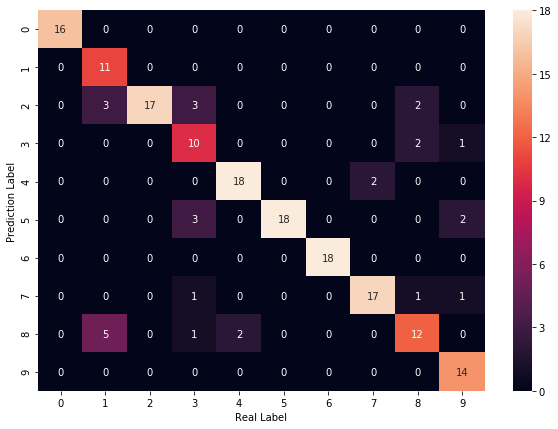

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:65 index:[5] real:5
#1 min_error:61 index:[2] real:2
#2 min_error:79 index:[8] real:8
#3 min_error:19 index:[0] real:0
#4 min_error:62 index:[1] real:1
#5 min_error:61 index:[7] real:7
#6 min_error:41 index:[6] real:6
#7 min_error:59 index:[3] real:3
#8 min_error:33 index:[2] real:2
#9 min_error:62 index:[1] real:1
#10 min_error:73 index:[7] real:7
#11 min_error:86 index:[8] real:4
#12 min_error:42 index:[6] real:6
#13 min_error:59 index:[3] real:3
#14 min_error:63 index:[1] real:1
#15 min_error:71 index:[3] real:3
#16 min_error:84 index:[7] real:9
#17 min_error:56 index:[1] real:1
#18 min_error:69 index:[7] real:7
#19 min_error:25 index:[6] real:6
#20 min_error:68 index:[8] real:8
#21 min_error:42 index:[4] real:4
#22 min_error:53 index:[3] real:3
#23 min_error:69 index:[1] real:1
#24 min_error:45 index:[4] real:4
#25 min_error:37 index:[0] real:0
#26 min_error:43 index:[5] real:5
#27 min_error:55 index:[3] real:3
#28 min_error:62 index:[6] real:6
#29 min_error:70 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9134199134199135
Avg Base Learner:0.7906270871985158


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

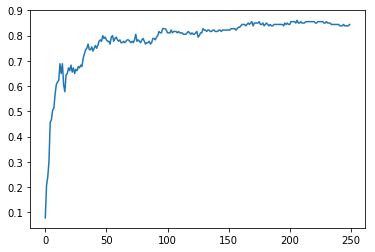

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4613 Total connections::4866
